# Project Outline
This is a project for I310D: Intro to Human-Centered Data Science
Through this project we made a logistic regression model to predict heart disease in hospital patients using the given features from our dataset. <br>
**Contributors:**
> Marcus Hanania, 
> Alex Sanders, 
> Max Diamond, 
> Alec McGhie


# Step 1: Data Preprocessing

## Step 1.1: Importing Libraries

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

## Step 1.2 getting data into dataframe
Original link to dataset [Data.World](https://data.world/informatics-edu/heart-disease-prediction/workspace/file?filename=+Heart_Disease_Prediction.csv)


In [30]:
# Original data.world link https://data.world/informatics-edu/heart-disease-prediction/workspace/file?filename=+Heart_Disease_Prediction.csv 

heart_disease_df = pd.read_csv('https://query.data.world/s/aqluhaiqan36o23rkfmdazxz2rgwqq?dws=00000')

heart_disease_df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


## Step 1.3: Processing the labels column


In [48]:
#Replacing the data in the `Heart Disease` to be integers
heart_disease_df['Heart Disease'] = heart_disease_df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})

## Step 1.4: Creating the labels and features


In [49]:
#Splitting the data
heart_disease_labels = heart_disease_df['Heart Disease']
heart_disease_features = heart_disease_df.drop('Heart Disease', axis = 1)

# Step 2: Creating the LogisticRegression Model

## Step 2.1: Splitting the data Creating X_train X_test Y_train and Y_Test from the dataframes declared above

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_disease_features, 
                                                    heart_disease_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Step 2.2: Running the logistic regression model


In [51]:
# Create a logistic regression model
logreg = LogisticRegression(max_iter= 1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

## Step 2.3: Getting the model for demo
Using the pickle library to open and save the model into the collab files tab

In [52]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)
    

## Step 2.4: Evaluating the models accuracy, precision, recall, and F1-score

In [53]:
# Evaluate the model using various metrics such as accuracy, precision, recall, F1-score, etc.
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision: 0.9473684210526315
Recall: 0.8571428571428571
F1-score: 0.9


# Step 3: Plotting out the data into visual representation


## Step 3.1: Finding Percentage of Heart Disease Cases by Age Range

<ipython-input-54-bd451b827b45>:3: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (heart_disease_count / len(dataframe)) * 100


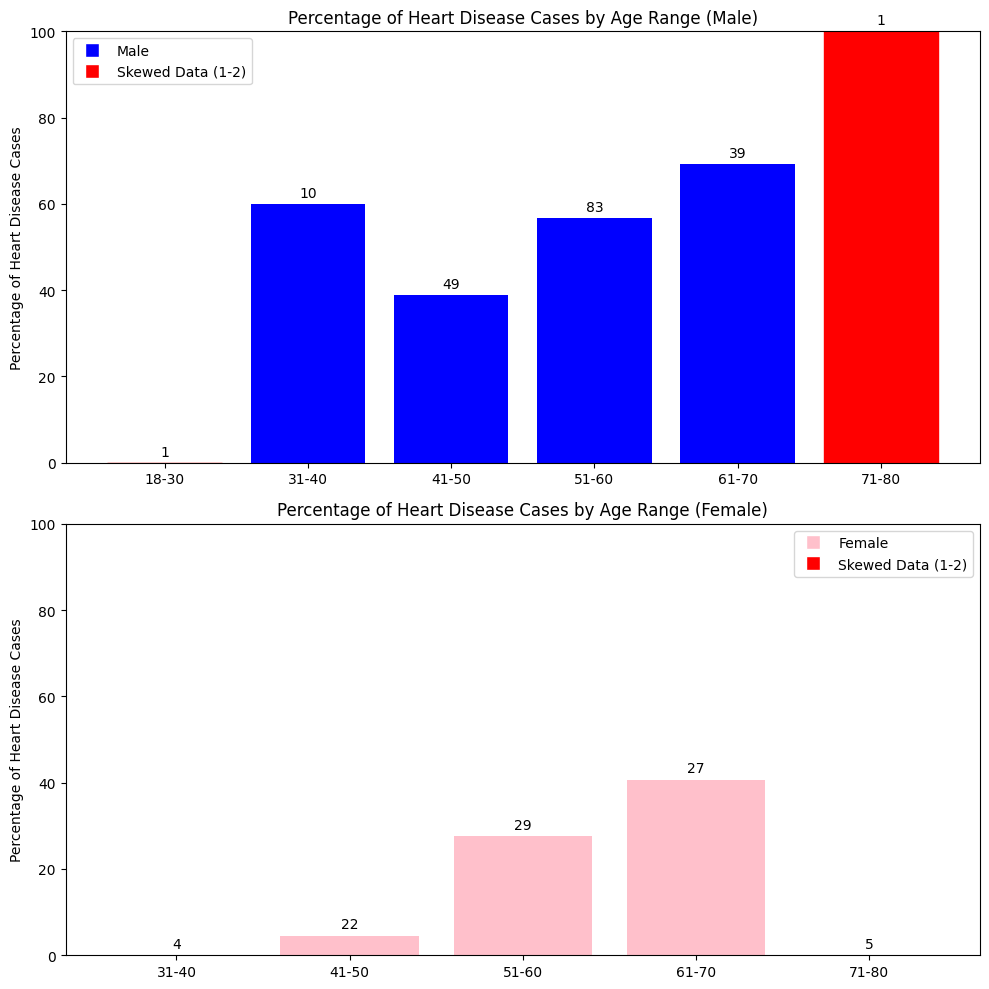

'plt.tight_layout()\nplt.show()'

In [54]:
def calculate_hd_percentage(dataframe):
    heart_disease_count = dataframe['Heart Disease'].sum()
    percentage = (heart_disease_count / len(dataframe)) * 100
    return percentage

male_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80)]
female_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80)]

# Create a new DataFrame with age, sex, and heart disease data
age_sex_hd_data = heart_disease_df[['Age', 'Sex', 'Heart Disease']].copy()

# Replace sex codes with 'Male' and 'Female' for readability
age_sex_hd_data['Sex'] = age_sex_hd_data['Sex'].replace({1: 'Male', 0: 'Female'})

# Calculate the percentage of heart disease cases in each age range for both genders
male_percentages = [calculate_hd_percentage(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Male') &
                                                            (age_sex_hd_data['Age'] >= min_age) &
                                                            (age_sex_hd_data['Age'] <= max_age)])
                    for min_age, max_age in male_age_ranges]

female_percentages = [calculate_hd_percentage(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Female') &
                                                              (age_sex_hd_data['Age'] >= min_age) &
                                                              (age_sex_hd_data['Age'] <= max_age)])
                      for min_age, max_age in female_age_ranges]

# Calculate the number of data points in each age range for both genders
male_data_counts = [len(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Male') &
                                       (age_sex_hd_data['Age'] >= min_age) &
                                       (age_sex_hd_data['Age'] <= max_age)])
                    for min_age, max_age in male_age_ranges]

female_data_counts = [len(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Female') &
                                         (age_sex_hd_data['Age'] >= min_age) &
                                         (age_sex_hd_data['Age'] <= max_age)])
                      for min_age, max_age in female_age_ranges]

# Generate bar graphs for both genders
x_labels_male = [f'{min_age}-{max_age}' for min_age, max_age in male_age_ranges]
x_labels_female = [f'{min_age}-{max_age}' for min_age, max_age in female_age_ranges]

fig, ax = plt.subplots(2, 1, figsize=(10, 10))


# Formating the Male's Plot
male_bar = ax[0].bar(x_labels_male, male_percentages, color='blue')
ax[0].set_ylabel('Percentage of Heart Disease Cases')
ax[0].set_title('Percentage of Heart Disease Cases by Age Range (Male)')
ax[0].set_ylim(0, 100)

# Formating the Female's Plot
female_bar = ax[1].bar(x_labels_female, female_percentages, color='pink')
ax[1].set_ylabel('Percentage of Heart Disease Cases')
ax[1].set_title('Percentage of Heart Disease Cases by Age Range (Female)')
ax[1].set_ylim(0, 100)

# Annotate bars with the number of data points
for i, rect in enumerate(male_bar):
    height = rect.get_height()
    count = male_data_counts[i]
    ax[0].annotate(f'{count}', xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    if count <= 2:
        rect.set_color('red')

for i, rect in enumerate(female_bar):
    height = rect.get_height()
    count = female_data_counts[i]
    ax[1].annotate(f'{count}', xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    if count <= 2:
        rect.set_color('red')

# Create custom legend handles and labels
male_legend_elements = [Line2D([0], [0], marker='s', color='w', label='Male', markerfacecolor='blue', markersize=10),
                        Line2D([0], [0], marker='s', color='w', label='Skewed Data (1-2)', markerfacecolor='red', markersize=10)]

female_legend_elements = [Line2D([0], [0], marker='s', color='w', label='Female', markerfacecolor='pink', markersize=10),
                          Line2D([0], [0], marker='s', color='w', label='Skewed Data (1-2)', markerfacecolor='red', markersize=10)]

ax[0].legend(handles=male_legend_elements)
ax[1].legend(handles=female_legend_elements)

# Displaying the plots
plt.tight_layout()
plt.show()


These two bar graphs are showing different age ranges for genders in correlation to heart disease and plotting the outliers ofthe data in red



## Step 3.2: Patients Pain While Working out 

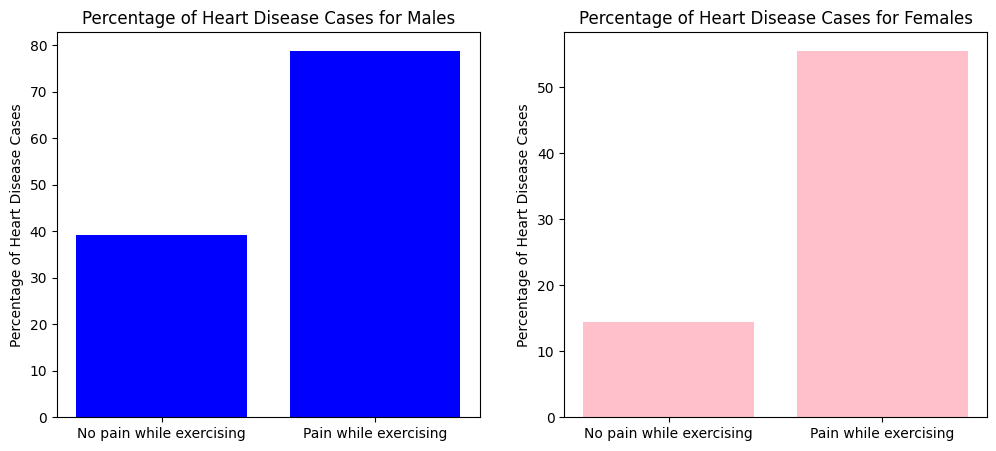

In [38]:
# Split the data by gender
male_df = heart_disease_df[heart_disease_df['Sex'] == 1]
female_df = heart_disease_df[heart_disease_df['Sex'] == 0]

# Count the number of heart disease cases in both genders based on exercise
male_noexercise_hd = male_df[male_df['Exercise angina'] == 0]['Heart Disease'].sum()
male_exercise_hd = male_df[male_df['Exercise angina'] == 1]['Heart Disease'].sum()
female_noexercise_hd = female_df[female_df['Exercise angina'] == 0]['Heart Disease'].sum()
female_exercise_hd = female_df[female_df['Exercise angina'] == 1]['Heart Disease'].sum()

# Calculate the percentage of heart disease cases in both genders based on exercise
male_noexercise_pct = (male_noexercise_hd / len(male_df[male_df['Exercise angina'] == 0])) * 100
male_exercise_pct = (male_exercise_hd / len(male_df[male_df['Exercise angina'] == 1])) * 100
female_noexercise_pct = (female_noexercise_hd / len(female_df[female_df['Exercise angina'] == 0])) * 100
female_exercise_pct = (female_exercise_hd / len(female_df[female_df['Exercise angina'] == 1])) * 100

# Generate bar graphs for both genders based on exercise
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Formating the two graphs below
ax1.bar(['No pain while exercising'], [male_noexercise_pct], color='blue')
ax1.bar(['Pain while exercising'], [male_exercise_pct], color='blue')
ax1.set_ylabel('Percentage of Heart Disease Cases')
ax1.set_title('Percentage of Heart Disease Cases for Males')

ax2.bar(['No pain while exercising'], [female_noexercise_pct], color='pink')
ax2.bar(['Pain while exercising'], [female_exercise_pct], color='pink')
ax2.set_ylabel('Percentage of Heart Disease Cases')
ax2.set_title('Percentage of Heart Disease Cases for Females')

# Displaying the plots
plt.show()


These two graphs are showing if the paitent is experiencing pain or not while working out and the percentage of which are having heart disease 

## Step 3.3: Blood Pressure 

Text(0.5, 1.0, 'Heart Disease by Blood Pressure Range for Females')

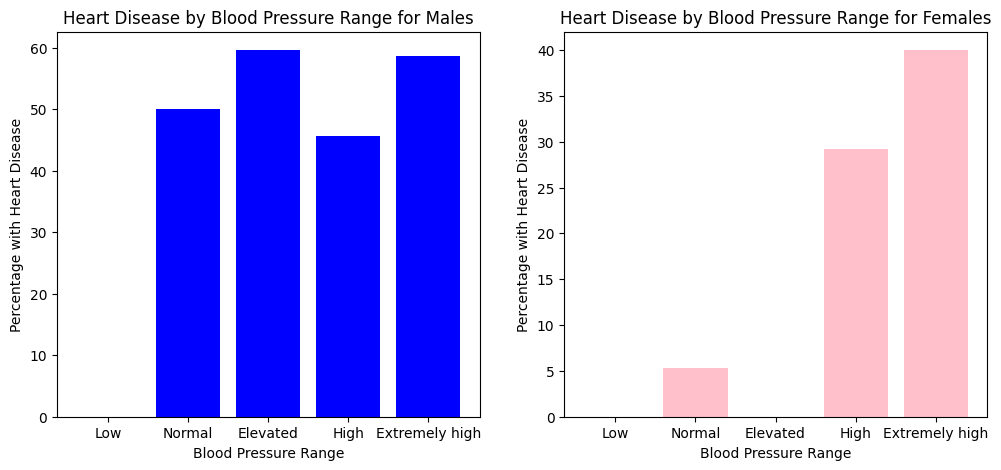

In [39]:
# Split the data by gender
male_df = heart_disease_df[heart_disease_df['Sex'] == 1]
female_df = heart_disease_df[heart_disease_df['Sex'] == 0]

# Define the blood pressure ranges
bp_ranges = {'Low' : (0,90), 'Normal': (90, 120), 'Elevated': (120, 130), 'High': (130, 140), 'Extremely high': (140, 1000)}

male_bp_counts = []
for bp_range_name, bp_range in bp_ranges.items():
    bp_range_mask = (male_df['BP'] >= bp_range[0]) & (male_df['BP'] < bp_range[1])
    bp_range_heart_disease = male_df[bp_range_mask & (male_df['Heart Disease'] == 1)]
    bp_range_count = bp_range_heart_disease.shape[0]
    total_count = male_df[bp_range_mask].shape[0]
    if total_count == 0:
        male_bp_counts.append(0)
    else:
        male_bp_counts.append(bp_range_count / total_count * 100)

female_bp_counts = []
for bp_range_name, bp_range in bp_ranges.items():
    bp_range_mask = (female_df['BP'] >= bp_range[0]) & (female_df['BP'] < bp_range[1])
    bp_range_heart_disease = female_df[bp_range_mask & (female_df['Heart Disease'] == 1)]
    bp_range_count = bp_range_heart_disease.shape[0]
    total_count = female_df[bp_range_mask].shape[0]
    if total_count == 0:
        female_bp_counts.append(0)
    else:
        female_bp_counts.append(bp_range_count / total_count * 100)

# Generate the bar charts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.bar(list(bp_ranges.keys()), male_bp_counts, color='blue')
ax1.set_xlabel('Blood Pressure Range')
ax1.set_ylabel('Percentage with Heart Disease')
ax1.set_title('Heart Disease by Blood Pressure Range for Males')

ax2.bar(list(bp_ranges.keys()), female_bp_counts, color='pink')
ax2.set_xlabel('Blood Pressure Range')
ax2.set_ylabel('Percentage with Heart Disease')
ax2.set_title('Heart Disease by Blood Pressure Range for Females')


These two graphs are showing the type of blood pressue Low (>90)', 'Normal (90-120)', 'Elevated (120-130)', 'High (130-140)', 'Extremely High (140-1000). 

## Step 3.4: Features Importances 

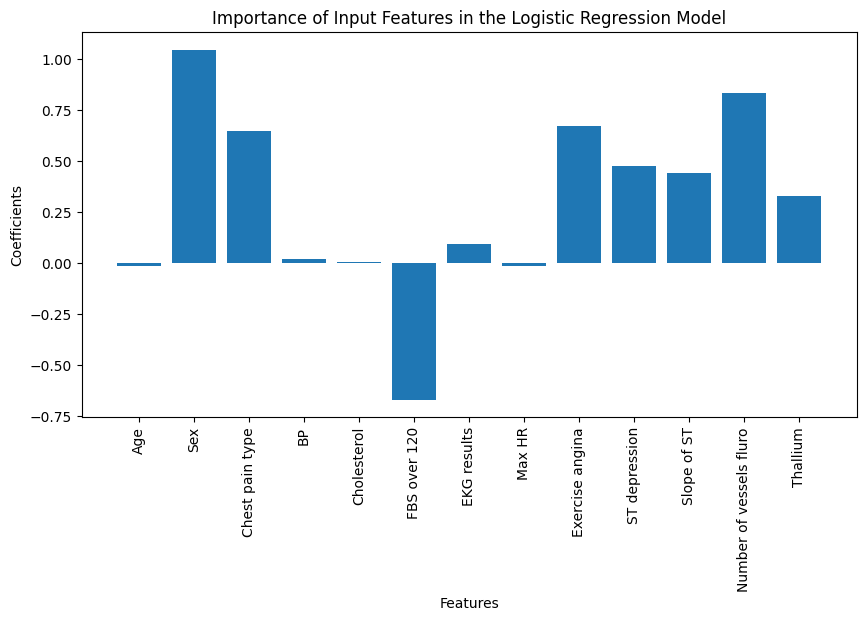

                    Feature  Importance
1                       Sex    1.047216
11  Number of vessels fluro    0.836211
8           Exercise angina    0.675063
2           Chest pain type    0.646917
9             ST depression    0.476928
10              Slope of ST    0.444288
12                 Thallium    0.328358
6               EKG results    0.092292
3                        BP    0.023329
4               Cholesterol    0.005032
7                    Max HR   -0.011386
0                       Age   -0.013954
5              FBS over 120   -0.668776


In [40]:
# Plot the feature importances (coefficients) of the logistic regression model
plt.figure(figsize=(10,5))
plt.bar(heart_disease_features.columns, logreg.coef_[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Importance of Input Features in the Logistic Regression Model')
plt.show()

# Find the most important feature and its index
most_important_feature_index = np.argmax(np.abs(logreg.coef_[0]))
most_important_feature_name = heart_disease_features.columns[most_important_feature_index]

feature_importance = pd.DataFrame({"Feature": heart_disease_features.columns, "Importance": logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)


## Step 3.5: Bar Graph of Heart Disease by Gender

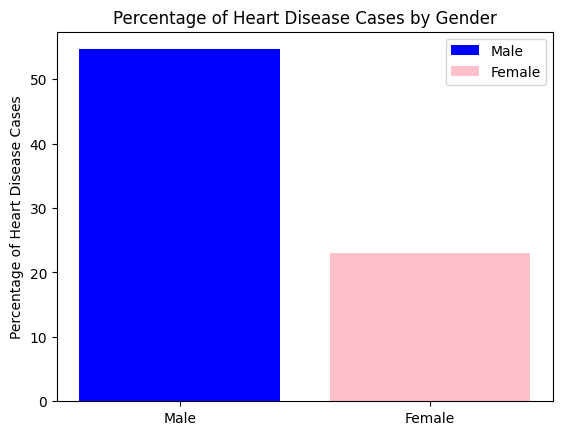

Male: 100 out of 183 have heart disease
Female: 20 out of 87 have heart disease


In [41]:
# Split the data by gender
male_df = heart_disease_df[heart_disease_df['Sex'] == 1]
female_df = heart_disease_df[heart_disease_df['Sex'] == 0]

# Count the number of heart disease cases in both genders
male_heart_disease_count = male_df['Heart Disease'].sum()
female_heart_disease_count = female_df['Heart Disease'].sum()

# Calculate the percentage of heart disease cases in both genders
male_percentage = (male_heart_disease_count / len(male_df)) * 100
female_percentage = (female_heart_disease_count / len(female_df)) * 100

# Generate bar graphs for both genders
fig, ax = plt.subplots()
ax.bar(['Male'], [male_percentage], color='blue', label='Male')
ax.bar(['Female'], [female_percentage], color='pink', label='Female')
ax.set_ylabel('Percentage of Heart Disease Cases')
ax.set_title('Percentage of Heart Disease Cases by Gender')
ax.legend()
plt.show()

# Print the number of people with and without heart disease for both genders as percentages
print(f'Male: {male_heart_disease_count} out of {len(male_df)} have heart disease')
print(f'Female: {female_heart_disease_count} out of {len(female_df)} have heart disease')




## Step 3.6: Heat Map

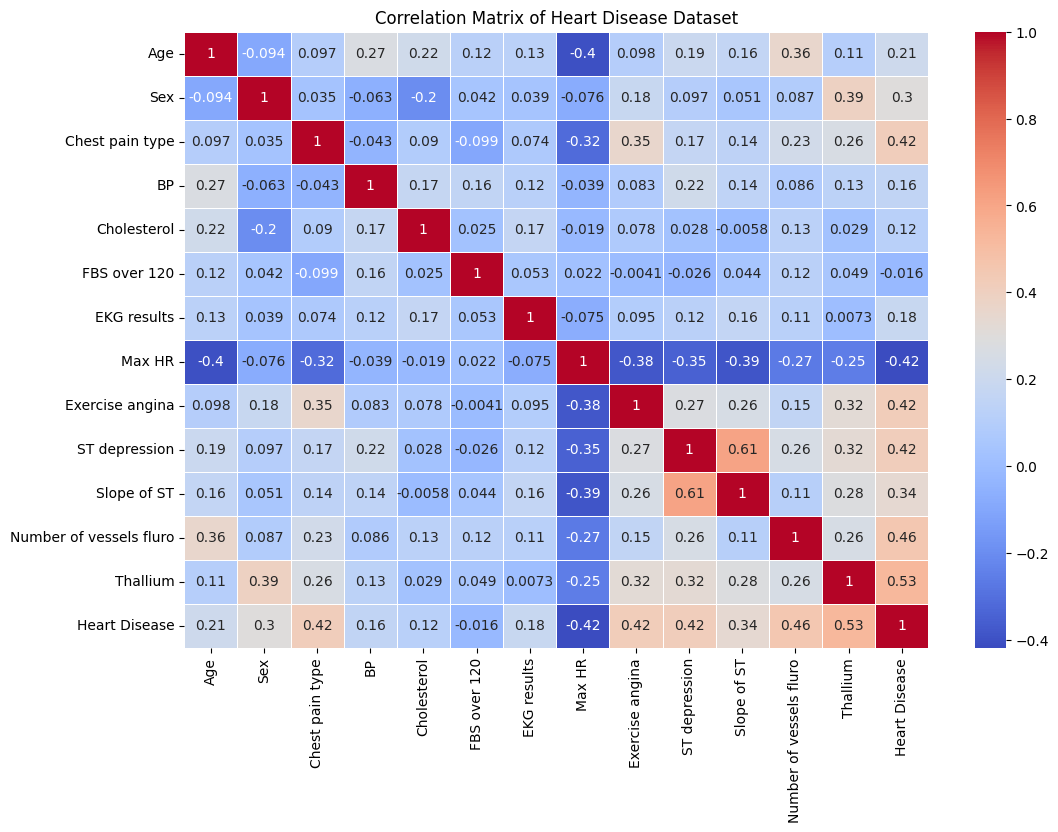

In [56]:
# Calculate the correlation matrix
correlation_matrix = heart_disease_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()


As shown above by the matrix, the inputs in the data set seem to have virtually no correlation. The highest corrleation to heart disease in the data set is thallium and number of vessels fluro 


#Step 4: Diving into thallium 

## Step 4.1: Graphing out the thallium test levels by gender

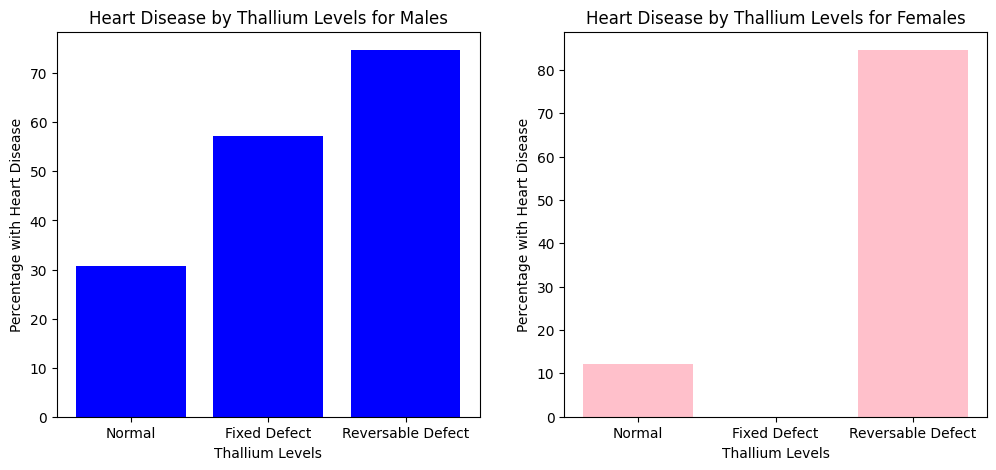

In [43]:
# Split the data by gender and thallium levels
male_normal_df = heart_disease_df[(heart_disease_df['Sex'] == 1) & (heart_disease_df['Thallium'] == 3)]
male_fixed_defect_df = heart_disease_df[(heart_disease_df['Sex'] == 1) & (heart_disease_df['Thallium'] == 6)]
male_reversable_defect_df = heart_disease_df[(heart_disease_df['Sex'] == 1) & (heart_disease_df['Thallium'] == 7)]
female_normal_df = heart_disease_df[(heart_disease_df['Sex'] == 0) & (heart_disease_df['Thallium'] == 3)]
female_fixed_defect_df = heart_disease_df[(heart_disease_df['Sex'] == 0) & (heart_disease_df['Thallium'] == 6)]
female_reversable_defect_df = heart_disease_df[(heart_disease_df['Sex'] == 0) & (heart_disease_df['Thallium'] == 7)]

# Define the thallium levels
thallium_levels = {'Normal': 3, 'Fixed Defect': 6, 'Reversable Defect': 7}

# Calculate the percentage of individuals with heart disease for each thallium level and gender
male_counts = [((male_normal_df['Heart Disease'] == 1).mean() * 100),
               ((male_fixed_defect_df['Heart Disease'] == 1).mean() * 100),
               ((male_reversable_defect_df['Heart Disease'] == 1).mean() * 100)]

female_counts = [((female_normal_df['Heart Disease'] == 1).mean() * 100),
                 ((female_fixed_defect_df['Heart Disease'] == 1).mean() * 100),
                 ((female_reversable_defect_df['Heart Disease'] == 1).mean() * 100)]
# Generate the bar charts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.bar(list(thallium_levels.keys()), male_counts, color='blue')
ax1.set_xlabel('Thallium Levels')
ax1.set_ylabel('Percentage with Heart Disease')
ax1.set_title('Heart Disease by Thallium Levels for Males')

ax2.bar(list(thallium_levels.keys()), female_counts, color='pink')
ax2.set_xlabel('Thallium Levels')
ax2.set_ylabel('Percentage with Heart Disease')
ax2.set_title('Heart Disease by Thallium Levels for Females')

plt.show()


We found in this graph that patients that experienced reversible defects had a higher chance of having heart disease, this is because high exposure to thallium can cause an increase in blood pressure as thallium causes blood vessels to constriction when exposed to high levels which can lead to heart disease or hypertension.

## Step 4.2: Graphing out the thallium test levels by gender and age

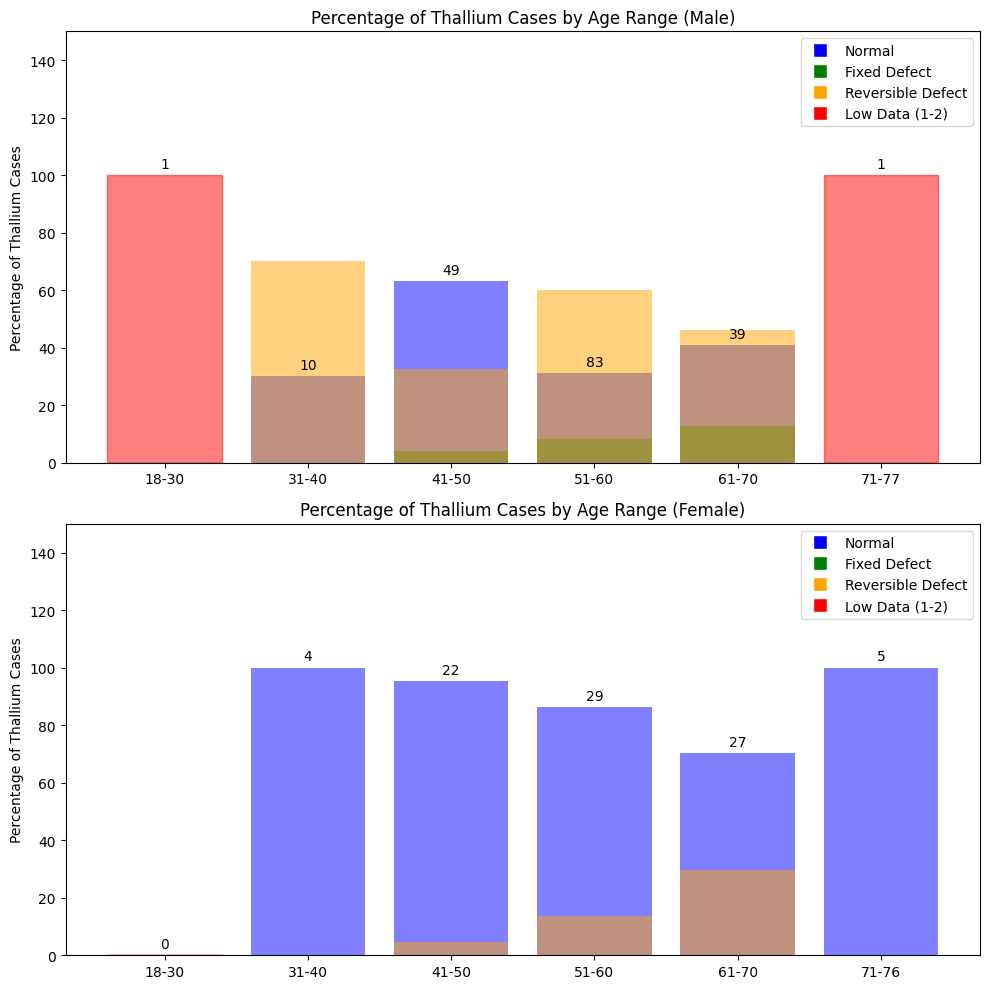

In [46]:
import matplotlib.pyplot as plt

def calculate_thallium_percentage(dataframe, thallium_type):
    if len(dataframe) == 0:
        return 0
    thallium_count = len(dataframe[dataframe['Thallium'] == thallium_type])
    percentage = (thallium_count / len(dataframe)) * 100
    return percentage


def count_data_points(dataframe, sex, min_age, max_age):
    return len(dataframe[(dataframe['Sex'] == sex) & (dataframe['Age'] >= min_age) & (dataframe['Age'] <= max_age)])

male_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 77)]
female_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 76)]

age_sex_hd_data = heart_disease_df[['Age', 'Sex', 'Thallium']].copy()
age_sex_hd_data['Sex'] = age_sex_hd_data['Sex'].replace({1: 'Male', 0: 'Female'})

thallium_types = [3, 6, 7]
male_percentages = {thallium_type: [calculate_thallium_percentage(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Male') & 
                                                                                  (age_sex_hd_data['Age'] >= min_age) & 
                                                                                  (age_sex_hd_data['Age'] <= max_age)], 
                                                                  thallium_type)
                                    for min_age, max_age in male_age_ranges]
                    for thallium_type in thallium_types}

female_percentages = {thallium_type: [calculate_thallium_percentage(age_sex_hd_data[(age_sex_hd_data['Sex'] == 'Female') & 
                                                                                    (age_sex_hd_data['Age'] >= min_age) & 
                                                                                    (age_sex_hd_data['Age'] <= max_age)], 
                                                                  thallium_type)
                                      for min_age, max_age in female_age_ranges]
                      for thallium_type in thallium_types}

x_labels_male = [f'{min_age}-{max_age}' for min_age, max_age in male_age_ranges]
x_labels_female = [f'{min_age}-{max_age}' for min_age, max_age in female_age_ranges]

male_data_counts = [count_data_points(age_sex_hd_data, 'Male', min_age, max_age) for min_age, max_age in male_age_ranges]
female_data_counts = [count_data_points(age_sex_hd_data, 'Female', min_age, max_age) for min_age, max_age in female_age_ranges]

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

colors = ['blue', 'green', 'orange']
thallium_labels = ['Normal', 'Fixed Defect', 'Reversible Defect']
for i, thallium_type in enumerate(thallium_types):
    male_bar = ax[0].bar(x_labels_male, male_percentages[thallium_type], color=colors[i], label=thallium_labels[i], alpha=0.5)
    female_bar = ax[1].bar(x_labels_female, female_percentages[thallium_type], color=colors[i], label=thallium_labels[i], alpha=0.5)

# Display the number of data points above the bars
for i, rect in enumerate(ax[0].containers[0]):
    height = rect.get_height()
   
    ax[0].annotate(f'{male_data_counts[i]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for i, rect in enumerate(ax[1].containers[0]):
    height = rect.get_height()
    ax[1].annotate(f'{female_data_counts[i]}', xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Highlight the age ranges with only 1-2 data points by making the bars red
for i, count in enumerate(male_data_counts):
    if count <= 2:
        for rect in [bar[i] for bar in ax[0].containers]:
            rect.set_color('red')

for i, count in enumerate(female_data_counts):
    if count <= 2:
        for rect in [bar[i] for bar in ax[1].containers]:
            rect.set_color('red')


# Creating a legend for the plot

legend_elements = [Line2D([0], [0], marker='s', color='w', label=thallium_labels[i], markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]
legend_elements.append(Line2D([0], [0], marker='s', color='w', label='Low Data (1-2)', markerfacecolor='red', markersize=10))

# Attaching the legend to the graph

ax[0].legend(handles=legend_elements)
ax[1].legend(handles=legend_elements)

# Creating the title and labels for the two graphs

ax[0].set_ylabel('Percentage of Thallium Cases')
ax[0].set_title('Percentage of Thallium Cases by Age Range (Male)')
ax[0].set_ylim(0, 150)

ax[1].set_ylabel('Percentage of Thallium Cases')
ax[1].set_title('Percentage of Thallium Cases by Age Range (Female)')
ax[1].set_ylim(0, 150)

plt.tight_layout()
plt.show()


This is a clear indicator that men are expercing reversible defects earlier among ages then women are.

#Step 4: Number of vessels of fluro 


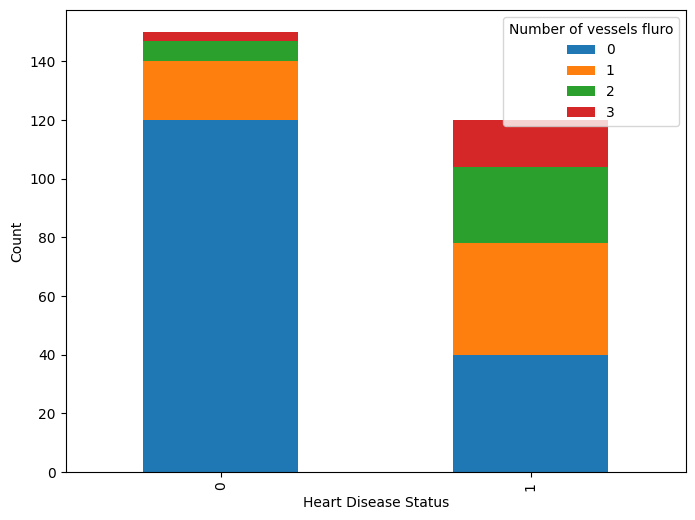

In [55]:
# Group the data by heart disease status and number of vessels fluro
grouped_data = heart_disease_df.groupby(['Heart Disease', 'Number of vessels fluro']).size().reset_index(name='counts')

# Pivot the data to create a bar graph
pivot_data = grouped_data.pivot(index='Heart Disease', columns='Number of vessels fluro', values='counts')

# Plot the bar graph
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel("Heart Disease Status")
ax.set_ylabel("Count")
plt.show()